# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

# Pandas Basic 3

In [1]:
from IPython.display import Image

reference = lambda file, w=None, h=None : \
    Image(filename=file, width=w, height=h) 

# images
Table5_1  = "images/Table5-1.png"   # DataFrame 생성자에서 사용 가능한 입력 데이터
Table5_2  = "images/Table5-2.png"   # pandas의 주요 Index 객체
Table5_3  = "images/Table5-3.png"   # Index 메소드와 속성
Table5_4  = "images/Table5-4.png"   # reindex 메소드(보간) 옵션
Table5_5  = "images/Table5-5.png"   # 재색인 함수 인자
Table5_6  = "images/Table5-6.png"   # DataFrame의 값 선택하기
Table5_7  = "images/Table5-7.png"   # 산술연산 메소드
Table5_8  = "images/Table5-8.png"   # 순위의 동률을 처리하는 메소드
Table5_9  = "images/Table5-9.png"   # 축소 메소드 옵션
Table5_10 = "images/Table5-10.png"  # 기술통계와 요약통계
Table5_11 = "images/Table5-11.png"  # 유일값, 값세기, 버리기 메소드
Table5_12 = "images/Table5-12.png"  # NA 처리 메소드
Table5_13 = "images/Table5-13.png"  # fillna 함수 인자

from pandas import Series, DataFrame
import pandas as pd
import numpy as np


## 3. Summarizing and computing descriptive statistics
> 기술통계 계산과 요약
- pandas 객체는 일반적인 수학 메소드와 통계 메소드를 가지고 있다.
- 대부분 Series나 DataFrame 하나의 칼럼이나 로우에서 단일 값(합이나 평균같은)을 구하는 축소 혹은 요약통계 범주
- 순수 NumPy 배열에서 제공하는 동일한 메소드와 비교하여 pandas의 메소드는 처음부터 누락된 데이터를 제외하도록 설계되었다.

In [2]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'],
               columns=['one', 'two'])
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

In [3]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [4]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [5]:
# skinpa : 누락된 값을 제외할 것인 정하는 옵션
df.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [6]:
df.mean(axis=1, skipna=True)

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

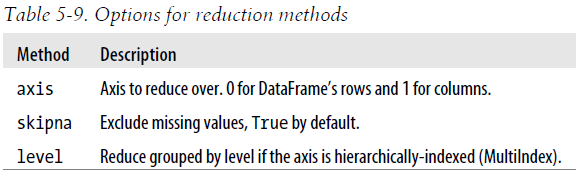

In [7]:
# 축소 메소드 옵션
reference(Table5_9, 450)

In [8]:
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

In [9]:
df.idxmax()

one    b
two    d
dtype: object

In [10]:
df.cumsum()

one  two
a  1.40  NaN
b  8.50 -4.5
c   NaN  NaN
d  9.25 -5.8

In [11]:
# 한번에 통계 결과를 여러개 만들어 내는 함수
df.describe()

one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000

In [12]:
obj = Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [13]:
['a', 'a', 'b', 'c'] * 4

['a',
 'a',
 'b',
 'c',
 'a',
 'a',
 'b',
 'c',
 'a',
 'a',
 'b',
 'c',
 'a',
 'a',
 'b',
 'c']

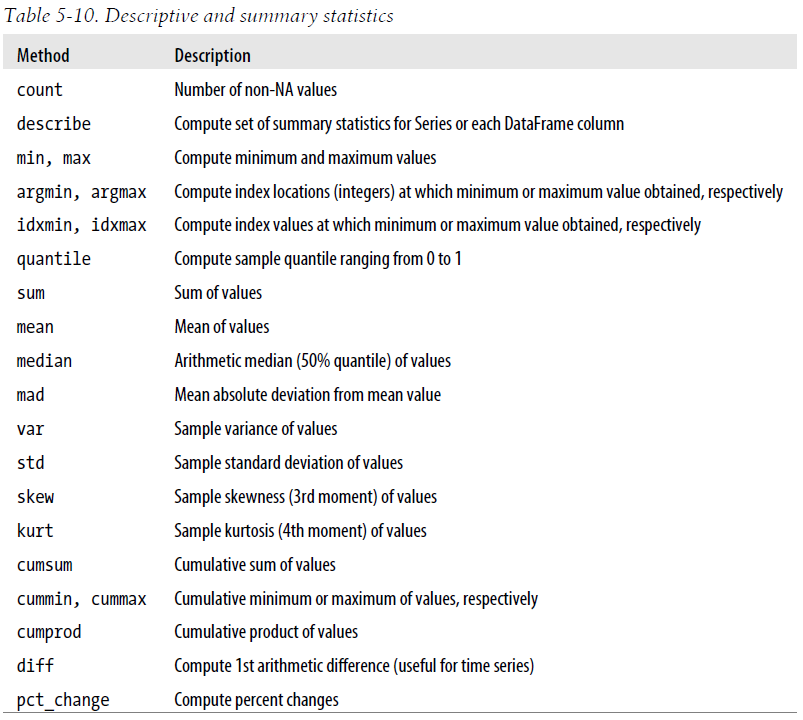

In [14]:
# 기술통계와 요약통계
reference(Table5_10, 600)

### <font color='brown'> Unique values, value counts, and membership </font>
> 유일 값, 값 세기, 멤버십

In [15]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [16]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [17]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [18]:
pd.value_counts(obj.values, sort=False)

d    1
a    3
b    2
c    3
dtype: int64

In [19]:
pd.value_counts(obj.values, sort=True)

c    3
a    3
b    2
d    1
dtype: int64

In [20]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [21]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [22]:
data = DataFrame({'Qu1': [1, 3, 4, 3, 4],
                  'Qu2': [2, 3, 1, 2, 3],
                  'Qu3': [1, 5, 2, 4, 4]})
data

Qu1  Qu2  Qu3
0    1    2    1
1    3    3    5
2    4    1    2
3    3    2    4
4    4    3    4

In [23]:
# DataFrame.apply() 
result = data.apply(pd.value_counts).fillna(0)
result

Qu1  Qu2  Qu3
1  1.0  1.0  1.0
2  0.0  2.0  1.0
3  2.0  2.0  0.0
4  2.0  0.0  2.0
5  0.0  0.0  1.0

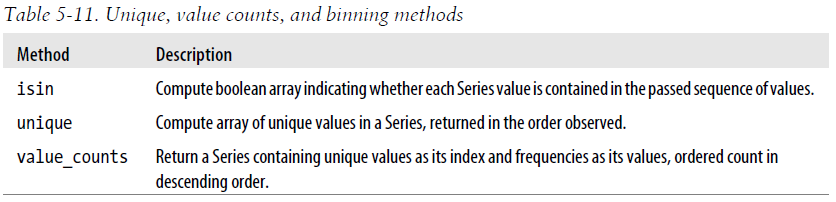

In [24]:
# 유일값, 값세기, 버리기 메소드
reference(Table5_11, 600)

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>